# À propos du calcul de π

## En demandant à la lib maths

Mon ordinateur m’indique que π vaut *approximativement*

In [1]:
from math import *
print(pi)

3.141592653589793


## En utilisant la méthode des aiguilles de Buffon

In [2]:
from IPython.display import HTML

Mais calculé avec la **méthode** des <a href="https://fr.wikipedia.org/wiki/Aiguille_de_Buffon">aiguilles de Buffon</a>, on obtiendrait comme **approximation** :

In [3]:
import numpy as np
np.random.seed(seed=42)
N = 10000
x = np.random.uniform(size=N, low=0, high=1)
theta = np.random.uniform(size=N, low=0, high=pi/2)
2/(sum((x+np.sin(theta))>1)/N)


3.128911138923655

## Avec un argument "fréquentiel" de surface

Sinon, une méthode plus simple à comprendre et ne faisant pas intervenir d’appel à la fonction sinus se base sur le fait que si *X* ∼ *U*(0,1) et *Y* ∼ *U*(0,1) alors *P*[$\mathrm{X}^2$ + $\mathrm{Y}^2$ ≤ 1] = π/4 (voir <a href="https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Monte-Carlo#D%C3%A9termination_de_la_valeur_de_%CF%80">méthode de Monte Carlo sur Wikipedia)</a>. Le code suivant illustre ce fait :

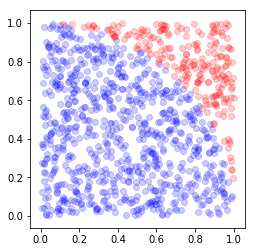

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

np.random.seed(seed=42)
N = 1000
x = np.random.uniform(size=N, low=0, high=1)
y = np.random.uniform(size=N, low=0, high=1)

accept = (x*x+y*y) <= 1
reject = np.logical_not(accept)

fig, ax = plt.subplots(1)
ax.scatter(x[accept], y[accept], c='b', alpha=0.2, edgecolor=None)
ax.scatter(x[reject], y[reject], c='r', alpha=0.2, edgecolor=None)
ax.set_aspect('equal')

Il est alors aisé d’obtenir une approximation (pas terrible) de π en comptant combien de fois, en moyenne, $\mathrm{X}^2$ + $\mathrm{Y}^2$ est inférieur à 1 :

In [5]:
 4*np.mean(accept)

3.112